###### In this notebook I attempt to fit my data using a neural network with the keras library. I import my cleaned data, perform a train-test split, make a simple neural network and build my model. Then I compare the predictions of my model with the actual results of my model to see if I can find issues in the predictions.

In [1]:
import pandas as pd
import numpy as np
import nltk
import re
sent_token = nltk.sent_tokenize
import csv  
from nltk import sent_tokenize, word_tokenize, pos_tag
import re
from sklearn.feature_extraction.text import CountVectorizer
wpt = nltk.WordPunctTokenizer()


file_path_comments = r'~/Documents/Springboard/Springboard/Data/cleaned_comment_data.csv'

#file_path_comments = r'/mnt/c/Users/msteele9/Documents/Springboard/Springboard/Data/cleaned_comment_data.csv'
clean_comments = pd.read_csv(file_path_comments, index_col = False)

In [2]:
from sklearn.model_selection import train_test_split
import random
from datetime import datetime

X = clean_comments['commentBody']
y = clean_comments['recommendations']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=random.seed(datetime.now()))

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
 
vectorizer = CountVectorizer(binary=False, stop_words=stopwords.words('english'), 
                             lowercase=True, min_df=1, max_df=0.9, max_features=5000)
X_train_onehot = vectorizer.fit_transform(X_train)

### Here I create a custom accuracy function to define what a 'correct' output looks like. Here I say that my model is successful if it is within ~10% of the correct value.

In [4]:
import keras.backend as K

def myAccuracy(y_true, y_pred):
    diff = K.abs(y_true-y_pred) #absolute difference between correct and predicted values
    correct = K.less(diff,0.1+(y_true/2)) #tensor with 0 for false values and 1 for true values
    return K.mean(correct) #sum all 1's and divide by the total. 

Using TensorFlow backend.
C:\Users\msteele9\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\msteele9\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\msteele9\AppData\Local\Programs\Python\Python36\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16",

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
    
model = Sequential()
 
model.add(Dense(units=2000, activation='linear', input_dim=len(vectorizer.get_feature_names())))
model.add(Dense(units=400, activation='linear'))
model.add(Dropout(0.2))
#model.add(Dense(units=400, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=400, activation='linear'))
model.add(Dense(units=400, activation='linear'))
model.add(Dense(units=1, activation='relu'))
 
model.compile(loss='mean_squared_logarithmic_error', optimizer='adam', metrics=[myAccuracy])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2000)              10002000  
_________________________________________________________________
dense_2 (Dense)              (None, 400)               800400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 400)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 400)               160400    
_________________________________________________________________
dense_4 (Dense)              (None, 400)               160400    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 401       
Total para

In [31]:
model.fit(X_train_onehot, y_train, 
          epochs=10, batch_size=1000, verbose=1, 
          validation_split=0.2)

Train on 32000 samples, validate on 8000 samples
Epoch 1/10
32000/32000 [==============================] - 2s 69us/step - loss: 1.8340 - myAccuracy: 0.2795 - val_loss: 1.5486 - val_myAccuracy: 0.3010
Epoch 2/10
32000/32000 [==============================] - 1s 47us/step - loss: 1.4972 - myAccuracy: 0.3125 - val_loss: 1.5574 - val_myAccuracy: 0.2968
Epoch 3/10
32000/32000 [==============================] - 1s 46us/step - loss: 1.4471 - myAccuracy: 0.3221 - val_loss: 1.6129 - val_myAccuracy: 0.2911
Epoch 4/10
32000/32000 [==============================] - 1s 46us/step - loss: 1.4408 - myAccuracy: 0.3226 - val_loss: 1.6477 - val_myAccuracy: 0.2937
Epoch 5/10
32000/32000 [==============================] - 1s 46us/step - loss: 1.4113 - myAccuracy: 0.3260 - val_loss: 1.6382 - val_myAccuracy: 0.2940
Epoch 6/10
32000/32000 [==============================] - 2s 47us/step - loss: 1.3945 - myAccuracy: 0.3329 - val_loss: 1.6588 - val_myAccuracy: 0.2913
Epoch 7/10
32000/32000 [=====================

In [14]:
X_test_onehot = vectorizer.fit_transform(X_test)

In [33]:
scores = model.evaluate(X_test_onehot, y_test, verbose=1)
print("Accuracy:", model.metrics_names, scores[0], scores[1])

10000/10000 [==============================] - 1s 63us/step
Accuracy: ['loss', 'myAccuracy'] 2.3878099201202394 0.2315


###### Now let's examine the predictions of my model. First I example five sample data points, and then I plot all of my data vs. their predicted values.

In [9]:
X_train[:5]

43622    Mitch McConnell will soon end the era of relat...
13305    It is dangerous and irresponsible for Mr. Carr...
21902                             Then watch PBS NewsHour.
17346    When protesters blocked ambulances on the inte...
32734    Joey and Jack Burone<br/>4/18/17<br/><br/>Toro...
Name: commentBody, dtype: object

In [10]:
prediction = model.predict(X_test_onehot)
print((prediction[:10]))

[[ 2.0154786]
 [11.110621 ]
 [ 0.8749746]
 [15.961445 ]
 [13.580138 ]
 [ 4.2290893]
 [ 2.304142 ]
 [12.646022 ]
 [ 1.1412611]
 [ 1.9258257]]


In [11]:
print(y_test.head(10))

22884     2.0
14257     6.0
30155     8.0
29834     0.0
10440     1.0
28068     9.0
4289     18.0
24204     0.0
49468     0.0
43036     0.0
Name: recommendations, dtype: float64


In [12]:
import matplotlib.pyplot as plt

# Plot
plt.scatter(y_test, prediction, alpha=0.5)
plt.title('Actual values vs. predictions')
plt.xlabel('Actual values')
plt.ylabel('predictions')

axes = plt.gca()
axes.set_xlim([0,1000])
axes.set_ylim([0,1000])
#axes.set_xscale('log')

plt.show()

<Figure size 640x480 with 1 Axes>

In [13]:
print(y_test.median())
print(y_test.mean())
print(prediction.mean())

3.0
17.2785
6.6775446


Text(0.5, 1.0, 'Predictions')

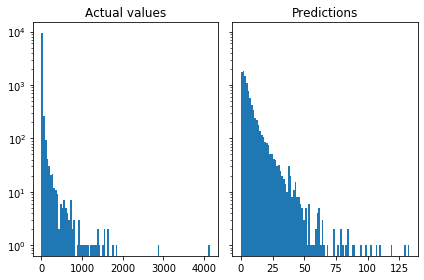

In [14]:
n_bins = 100

# Generate a normal distribution, center at x=0 and y=5
x = y_test
y = prediction

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)


# We can set the number of bins with the `bins` kwarg
axs[0].hist(x, bins=n_bins)
axs[0].set_yscale('log')
axs[0].set_title('Actual values')
axs[1].hist(y, bins=n_bins)
axs[1].set_yscale('log')
axs[1].set_title('Predictions')

It seems that our predictions fall within a range of 0 - 200, while the actual data runs from 0 - 1000 with a long tail. 

### Here I try to use Transfer Learning with spaCy embeddings

In [6]:
import os

#cwd = os.getcwd()  # Get the current working directory (cwd)
GLOVE_PATH = r'C:\Users\msteele9\Documents\Springboard'
os.chdir(GLOVE_PATH)

cwd = os.getcwd()

print(cwd)

files = os.listdir(cwd)  # Get all the files in that directory
print("Files in %r: %s" % (cwd, files))

C:\Users\msteele9\Documents\Springboard
Files in 'C:\\Users\\msteele9\\Documents\\Springboard': ['.git', 'ArticlesApril2017.csv', 'ArticlesApril2018.csv', 'ArticlesFeb2017.csv', 'ArticlesFeb2018.csv', 'ArticlesJan2017.csv', 'ArticlesJan2018.csv', 'ArticlesMarch2017.csv', 'ArticlesMarch2018.csv', 'ArticlesMay2017.csv', 'CommentsApril2017.csv', 'CommentsApril2018.csv', 'CommentsFeb2017.csv', 'CommentsFeb2018.csv', 'CommentsJan2017.csv', 'CommentsJan2018.csv', 'CommentsMarch2017.csv', 'CommentsMarch2018.csv', 'CommentsMay2017.csv', 'fasttext', 'fasttext-win64-latest-Release', 'GloVe-1.2', 'glove.twitter.27B.100d.txt', 'glove.twitter.27B.200d.txt', 'glove.twitter.27B.25d.txt', 'glove.twitter.27B.50d.txt', 'glove.twitter.27B.zip', 'Springboard']


In [7]:
word2idx = {word: idx for idx, word in enumerate(vectorizer.get_feature_names())}

import numpy as np

import os
cwd = os.getcwd()

GLOVE_PATH = r'C:\Users\msteele9\Documents\Springboard/glove.twitter.27B.25d.txt'
GLOVE_VECTOR_LENGHT = 25
 
def read_glove_vectors(path, lenght):
    embeddings = {}
    with open(path, encoding="utf-8") as glove_f:
        for line in glove_f:
            chunks = line.split()
            #assert len(chunks) == lenght + 1
            embeddings[chunks[0]] = np.array(chunks[1:], dtype='float32')
 
    return embeddings
 
GLOVE_INDEX = read_glove_vectors(GLOVE_PATH, GLOVE_VECTOR_LENGHT)
 
# Init the embeddings layer with GloVe embeddings
embeddings_index = np.zeros((len(vectorizer.get_feature_names()) + 1, GLOVE_VECTOR_LENGHT))
for word, idx in word2idx.items():
    try:
        embedding = GLOVE_INDEX[word]
        embeddings_index[idx] = embedding
    except:
        pass

In [20]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.layers import Dropout
    
model = Sequential()
 
model.add(Embedding(len(vectorizer.get_feature_names()) + 1,
                    GLOVE_VECTOR_LENGHT,  # Embedding size
                    weights=[embeddings_index],
                    #input_length=MAX_SEQ_LENGHT,
                    trainable=False))
model.add(LSTM(128))

model.add(Dense(units=400, activation='relu'))

model.add(Dense(units=1, activation='relu'))
 
model.compile(loss='mean_squared_logarithmic_error', optimizer='adam', metrics=[myAccuracy])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 25)          125025    
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               78848     
_________________________________________________________________
dense_18 (Dense)             (None, 400)               51600     
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 401       
Total params: 255,874
Trainable params: 130,849
Non-trainable params: 125,025
_________________________________________________________________


In [ ]:
model.fit(X_train_onehot, y_train, 
          epochs=3, batch_size=128, verbose=1, 
          validation_data=(X_test_onehot, y_test))
 
scores = model.evaluate(X_test_onehot, y_test, verbose=1)
print("Accuracy:", scores[1])  # 0.8296

Train on 40000 samples, validate on 10000 samples
Epoch 1/3
11520/40000 [=======>......................] - ETA: 15:52 - loss: 4.0882 - myAccuracy: 0.2667